# Data Preprocessing

#Import the libary to deal with tabular data and visualization
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

%matplotlib inline
%matplotlib notebook

In [1]:
#Import the libary to deal with tabular data and visualization
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
%matplotlib notebook

In [2]:
#Import the dataset
reproduce_df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')
#reproduce_df=pd.read_csv('Madedata1.csv')

In [3]:
#Data cleaning
#https://towardsdatascience.com/data-cleaning-with-python-and-pandas-detecting-missing-values-3e9c6ebcf78b
#Summarizing Missing Values
#check if any missing value in the dataset
reproduce_df.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [4]:
#TABLE 1. Patients information dataset
#glance at raw dataset first and last few rows 
reproduce_df.head(2)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight


In [5]:
reproduce_df.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [6]:
reproduce_df.columns = ['Gender', 'Age', 'Height', 'Weight', 'Family_History',
       'Consumption_high_caloric', 'Consumption_vegetables', 'Main_meals', 'Food_between_meals', 'Smoke', 'Consumption_water', 'Calories_monitoring', 'Physical_activity', 'Technology_devices',
       'Consumption_alcohol', 'Transportation', 'Obesity']

reproduce_df.head(80)

,Gender,Age,Height,Weight,Family_History,Consumption_high_caloric,Consumption_vegetables,Main_meals,Food_between_meals,Smoke,Consumption_water,Calories_monitoring,Physical_activity,Technology_devices,Consumption_alcohol,Transportation,Obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,Female,23.0,1.63,45.0,yes,no,3.0,3.0,Sometimes,no,3.0,yes,2.0,0.0,no,Public_Transportation,Insufficient_Weight
76,Female,24.0,1.60,45.0,yes,no,2.0,3.0,no,no,2.0,no,1.0,0.0,no,Public_Transportation,Insufficient_Weight
77,Female,24.0,1.70,80.0,yes,yes,2.0,3.0,Sometimes,no,3.0,no,0.0,0.0,no,Public_Transportation,Overweight_Level_II
78,Female,23.0,1.65,90.0,yes,yes,2.0,3.0,Sometimes,no,3.0,no,0.0,1.0,no,Public_Transportation,Obesity_Type_I


In [7]:
reproduce_df['Obesity'] = reproduce_df['Obesity'].apply(lambda x: x.replace('_', ''))
reproduce_df['Transportation'] = reproduce_df['Transportation'].apply(lambda x: x.replace('_', ' '))
reproduce_df['Height'] = reproduce_df['Height']*100
reproduce_df['Height'] = reproduce_df['Height'].round(2)
reproduce_df['Weight'] = reproduce_df['Weight'].round(1)
reproduce_df['Age'] = reproduce_df['Age'].round(1)

In [8]:
pd.set_option('display.max_columns', None)
reproduce_df.head(6)

,Gender,Age,Height,Weight,Family_History,Consumption_high_caloric,Consumption_vegetables,Main_meals,Food_between_meals,Smoke,Consumption_water,Calories_monitoring,Physical_activity,Technology_devices,Consumption_alcohol,Transportation,Obesity
0,Female,21.0,162.0,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public Transportation,NormalWeight
1,Female,21.0,152.0,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public Transportation,NormalWeight
2,Male,23.0,180.0,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public Transportation,NormalWeight
3,Male,27.0,180.0,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,OverweightLevelI
4,Male,22.0,178.0,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public Transportation,OverweightLevelII
5,Male,29.0,162.0,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,NormalWeight


In [9]:
for x in ['Age','Height','Weight','Consumption_vegetables', 'Main_meals', 'Consumption_water', 'Physical_activity', 'Technology_devices']:
    value = np.array(reproduce_df[x])
    print(x,':', 'min:', np.min(value), 'max:', np.max(value))

Age : min: 14.0 max: 61.0
Height : min: 145.0 max: 198.0
Weight : min: 39.0 max: 173.0
Consumption_vegetables : min: 1.0 max: 3.0
Main_meals : min: 1.0 max: 4.0
Consumption_water : min: 1.0 max: 3.0
Physical_activity : min: 0.0 max: 3.0
Technology_devices : min: 0.0 max: 2.0


In [10]:
# identity categorical variables (data type would be 'object')
cat = reproduce_df.dtypes == object
print(cat)
# When dtype == object is 'true'
print(cat[cat])
cat_labels = cat[cat].index
print('Categorical variables:', cat_labels)

# When dtype == object is 'false'
false = cat[~cat]
non_cat = false.index
print('Numerical variables:', non_cat)

Gender                       True
Age                         False
Height                      False
Weight                      False
Family_History               True
Consumption_high_caloric     True
Consumption_vegetables      False
Main_meals                  False
Food_between_meals           True
Smoke                        True
Consumption_water           False
Calories_monitoring          True
Physical_activity           False
Technology_devices          False
Consumption_alcohol          True
Transportation               True
Obesity                      True
dtype: bool
Gender                      True
Family_History              True
Consumption_high_caloric    True
Food_between_meals          True
Smoke                       True
Calories_monitoring         True
Consumption_alcohol         True
Transportation              True
Obesity                     True
dtype: bool
Categorical variables: Index(['Gender', 'Family_History', 'Consumption_high_caloric',
       'Food_be

In [11]:
for col in reproduce_df.select_dtypes('object'):
    print(f'{col:-<40} {reproduce_df[col].unique()}')

Gender---------------------------------- ['Female' 'Male']
Family_History-------------------------- ['yes' 'no']
Consumption_high_caloric---------------- ['no' 'yes']
Food_between_meals---------------------- ['Sometimes' 'Frequently' 'Always' 'no']
Smoke----------------------------------- ['no' 'yes']
Calories_monitoring--------------------- ['no' 'yes']
Consumption_alcohol--------------------- ['no' 'Sometimes' 'Frequently' 'Always']
Transportation-------------------------- ['Public Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']
Obesity--------------------------------- ['NormalWeight' 'OverweightLevelI' 'OverweightLevelII' 'ObesityTypeI'
 'InsufficientWeight' 'ObesityTypeII' 'ObesityTypeIII']


<IPython.core.display.Javascript object>


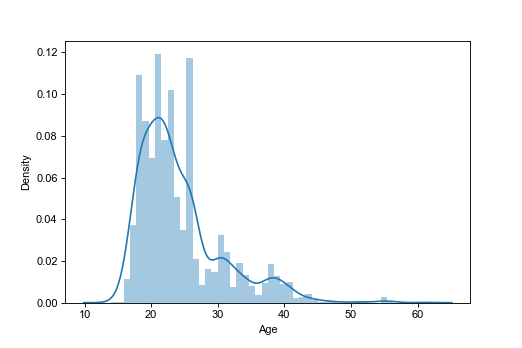

<IPython.core.display.Javascript object>


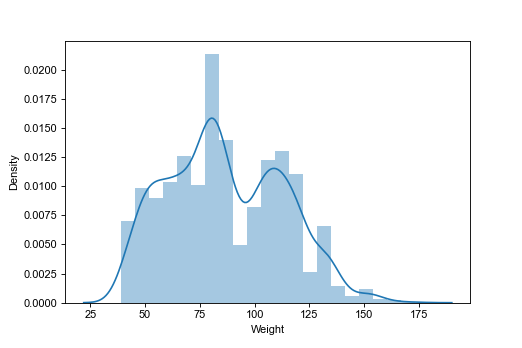

<IPython.core.display.Javascript object>


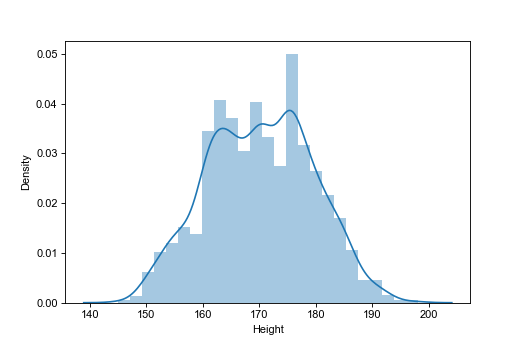

<IPython.core.display.Javascript object>


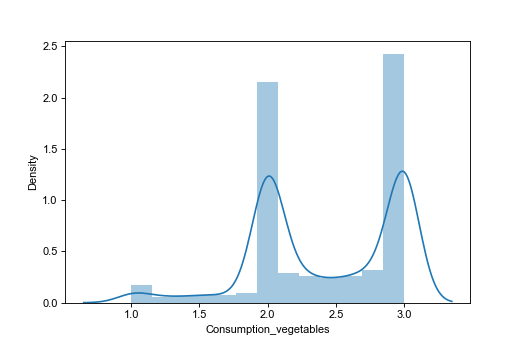

<IPython.core.display.Javascript object>


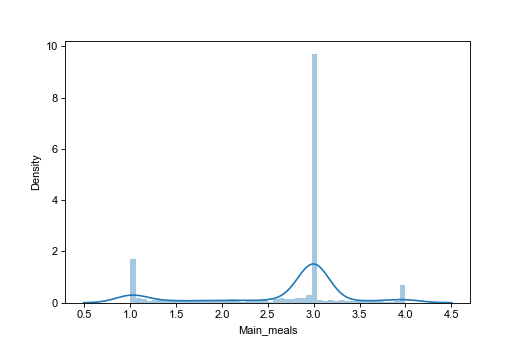

<IPython.core.display.Javascript object>


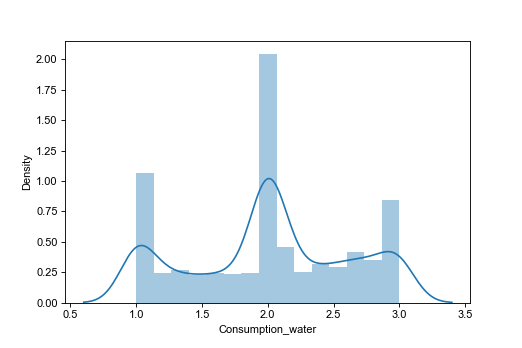

<IPython.core.display.Javascript object>


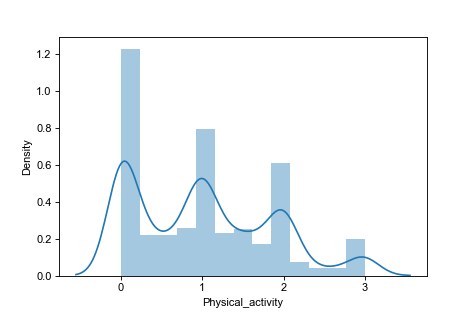

<IPython.core.display.Javascript object>


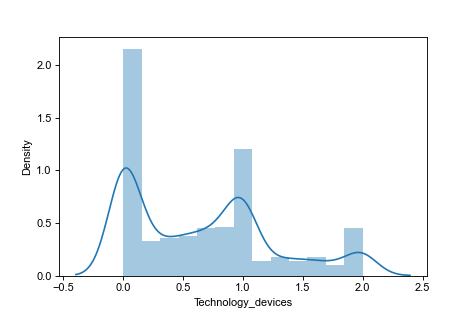

In [12]:
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
plt.figure()
a=sns.distplot(reproduce_df.Age)
a.figure.savefig("Age.png")
plt.show()

plt.figure()
b=sns.distplot(reproduce_df.Weight)
b.figure.savefig("Weight.png")
plt.show()

plt.figure()
c=sns.distplot(reproduce_df.Height)
c.figure.savefig("Height.png")
plt.show()

plt.figure()
k=sns.distplot(reproduce_df.Consumption_vegetables)
k.figure.savefig("Consumption_vegetables.png")
plt.show()

    
import seaborn as sns
plt.figure()
l=sns.distplot(reproduce_df.Main_meals)
l.figure.savefig("Main_meals.png")
plt.show()

import seaborn as sns
plt.figure()
m=sns.distplot(reproduce_df.Consumption_water)
m.figure.savefig("Consumption_water.png")
plt.show()

import seaborn as sns
plt.figure()
n=sns.distplot(reproduce_df.Physical_activity)
n.figure.savefig("Physical_activity.png")
plt.show()

import seaborn as sns
plt.figure()
o=sns.distplot(reproduce_df.Technology_devices)
o.figure.savefig("Technology_devices.png")
plt.show()

In [13]:
import seaborn as sns

In [14]:
mapping1 = {'no':0, 'yes':1}
mapping2 = {'no':1,'Sometimes':2,'Frequently':3,'Always':4}
mapping3 = {'InsufficientWeight':0,'NormalWeight':1,'OverweightLevelI':2,'OverweightLevelII':3,'ObesityTypeI':4
,'ObesityTypeII':5,'ObesityTypeIII':6}


In [15]:
reproduce_df['Family_History'] = reproduce_df['Family_History'].replace(mapping1)
reproduce_df['Consumption_high_caloric'] = reproduce_df['Consumption_high_caloric'].replace(mapping1)
reproduce_df['Food_between_meals'] = reproduce_df['Food_between_meals'].replace(mapping2)
reproduce_df['Smoke'] = reproduce_df['Smoke'].replace(mapping1)
reproduce_df['Calories_monitoring'] = reproduce_df['Calories_monitoring'].replace(mapping1)
reproduce_df['Consumption_alcohol'] = reproduce_df['Consumption_alcohol'].replace(mapping2)
reproduce_df['Obesity'] = reproduce_df['Obesity'].replace(mapping3)

In [16]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()
enc.fit(reproduce_df[["Gender","Transportation"]])
reproduce_df[["Gender","Transportation"]] = enc.transform(reproduce_df[["Gender","Transportation"]])
#le = LabelEncoder()
#reproduce_df.Gender= le.fit_transform(reproduce_df['Gender'])
#reproduce_df.Transportation= le.fit_transform(reproduce_df['Transportation'])
#reproduce_df.Obesity= le.fit_transform(reproduce_df['Obesity'])
#reproduce_df = pd.concat([reproduce_df,pd.get_dummies(reproduce_df.Transportation).add_prefix('Transportation')],axis=1)

In [17]:
reproduce_df.head(6)

,Gender,Age,Height,Weight,Family_History,Consumption_high_caloric,Consumption_vegetables,Main_meals,Food_between_meals,Smoke,Consumption_water,Calories_monitoring,Physical_activity,Technology_devices,Consumption_alcohol,Transportation,Obesity
0,0.0,21.0,162.0,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,1,3.0,1
1,0.0,21.0,152.0,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3.0,1
2,1.0,23.0,180.0,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,3,3.0,1
3,1.0,27.0,180.0,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,3,4.0,2
4,1.0,22.0,178.0,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3.0,3
5,1.0,29.0,162.0,53.0,0,1,2.0,3.0,2,0,2.0,0,0.0,0.0,2,0.0,1


In [18]:
reproduce_df.shape

(2111, 17)

In [19]:
#TABLE 2. Categorical-Categorical
#categorical-categorical
#https://thinkingneuron.com/how-to-visualize-the-relationship-between-two-categorical-variables-in-python/
#https://datagy.io/pandas-crosstab/
CrosstabResult=pd.crosstab(reproduce_df.Gender,reproduce_df.Obesity)
print(CrosstabResult)

Obesity    0    1    2    3    4    5    6
Gender                                    
0.0      173  141  145  103  156    2  323
1.0       99  146  145  187  195  295    1


In [20]:
reproduce_df.drop(['Transportation'], axis = 1)

,Gender,Age,Height,Weight,Family_History,Consumption_high_caloric,Consumption_vegetables,Main_meals,Food_between_meals,Smoke,Consumption_water,Calories_monitoring,Physical_activity,Technology_devices,Consumption_alcohol,Obesity
0,0.0,21.0,162.00,64.0,1,0,2.0,3.0,2,0,2.000000,0,0.000000,1.000000,1,1
1,0.0,21.0,152.00,56.0,1,0,3.0,3.0,2,1,3.000000,1,3.000000,0.000000,2,1
2,1.0,23.0,180.00,77.0,1,0,2.0,3.0,2,0,2.000000,0,2.000000,1.000000,3,1
3,1.0,27.0,180.00,87.0,0,0,3.0,3.0,2,0,2.000000,0,2.000000,0.000000,3,2
4,1.0,22.0,178.00,89.8,0,0,2.0,1.0,2,0,2.000000,0,0.000000,0.000000,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0.0,21.0,171.07,131.4,1,1,3.0,3.0,2,0,1.728139,0,1.676269,0.906247,2,6
2107,0.0,22.0,174.86,133.7,1,1,3.0,3.0,2,0,2.005130,0,1.341390,0.599270,2,6
2108,0.0,22.5,175.22,133.7,1,1,3.0,3.0,2,0,2.054193,0,1.414209,0.646288,2,6
2109,0.0,24.4,173.94,133.3,1,1,3.0,3.0,2,0,2.852339,0,1.139107,0.586035,2,6


In [21]:
#TABLE 3. Definition of COVID-19 datase
#Definition of COVID-19 dataset
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html
reproduce_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Gender                    2111 non-null   float64
 1   Age                       2111 non-null   float64
 2   Height                    2111 non-null   float64
 3   Weight                    2111 non-null   float64
 4   Family_History            2111 non-null   int64  
 5   Consumption_high_caloric  2111 non-null   int64  
 6   Consumption_vegetables    2111 non-null   float64
 7   Main_meals                2111 non-null   float64
 8   Food_between_meals        2111 non-null   int64  
 9   Smoke                     2111 non-null   int64  
 10  Consumption_water         2111 non-null   float64
 11  Calories_monitoring       2111 non-null   int64  
 12  Physical_activity         2111 non-null   float64
 13  Technology_devices        2111 non-null   float64
 14  Consumpt

In [22]:
reproduce_df.head(2)

,Gender,Age,Height,Weight,Family_History,Consumption_high_caloric,Consumption_vegetables,Main_meals,Food_between_meals,Smoke,Consumption_water,Calories_monitoring,Physical_activity,Technology_devices,Consumption_alcohol,Transportation,Obesity
0,0.0,21.0,162.0,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,1,3.0,1
1,0.0,21.0,152.0,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3.0,1


<IPython.core.display.Javascript object>


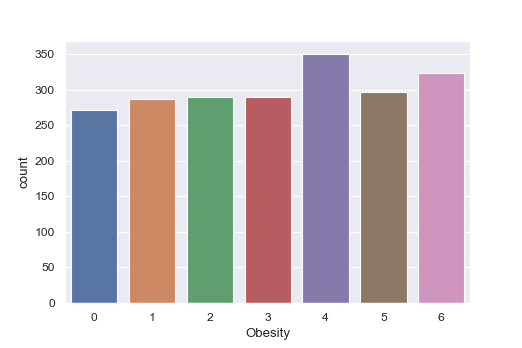

In [23]:
#FIGURE 3. Categorical-Continous for Contact_with_covid_patient
#https://towardsdatascience.com/a-complete-guide-to-plotting-categorical-variables-with-seaborn-bfe54db66bec
plt.figure()
import seaborn as sns
sns.set(style="darkgrid")
sns.countplot(data = reproduce_df,x = 'Obesity')
plt.show()

In [24]:
reproduce_df.head()

,Gender,Age,Height,Weight,Family_History,Consumption_high_caloric,Consumption_vegetables,Main_meals,Food_between_meals,Smoke,Consumption_water,Calories_monitoring,Physical_activity,Technology_devices,Consumption_alcohol,Transportation,Obesity
0,0.0,21.0,162.0,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,1,3.0,1
1,0.0,21.0,152.0,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3.0,1
2,1.0,23.0,180.0,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,3,3.0,1
3,1.0,27.0,180.0,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,3,4.0,2
4,1.0,22.0,178.0,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3.0,3


In [25]:
reproduce_df.columns

def col_no(x):
    d = {}
    d[reproduce_df.columns[x]] = x
    return(d)

print([col_no(x) for x in range(0, len(reproduce_df.columns))])

[{'Gender': 0}, {'Age': 1}, {'Height': 2}, {'Weight': 3}, {'Family_History': 4}, {'Consumption_high_caloric': 5}, {'Consumption_vegetables': 6}, {'Main_meals': 7}, {'Food_between_meals': 8}, {'Smoke': 9}, {'Consumption_water': 10}, {'Calories_monitoring': 11}, {'Physical_activity': 12}, {'Technology_devices': 13}, {'Consumption_alcohol': 14}, {'Transportation': 15}, {'Obesity': 16}]


Feature Selection

In [26]:
#TABLE 1. Patients information dataset
#glance at raw dataset first and last few rows 
reproduce_df.head(2)

,Gender,Age,Height,Weight,Family_History,Consumption_high_caloric,Consumption_vegetables,Main_meals,Food_between_meals,Smoke,Consumption_water,Calories_monitoring,Physical_activity,Technology_devices,Consumption_alcohol,Transportation,Obesity
0,0.0,21.0,162.0,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,1,3.0,1
1,0.0,21.0,152.0,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3.0,1


<IPython.core.display.Javascript object>


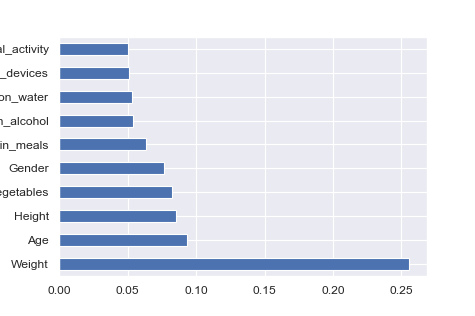

[0.07660118 0.09299654 0.08520205 0.2556227  0.04839676 0.0255463
 0.08229048 0.06311345 0.04409118 0.00465918 0.05279057 0.01304551
 0.05035263 0.05113173 0.05415974]


In [27]:
plt.figure()
x=reproduce_df.iloc[:,0:15]
y=reproduce_df['Obesity']
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x, y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot.barh()
plt.savefig("natalie1107.png",bbox_inches='tight')
plt.show()

# FIGURE 8. Obesity dataset feature selection
#https://www.analyticsvidhya.com/blog/2021/04/discovering-the-shades-of-feature-selection-methods/
plt.figure()
X=reproduce_df.iloc[:,0:15]
Y=reproduce_df['Obesity']
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X, Y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(16).plot.barh()
plt.show()
list1=feat_importances.keys().to_list()

<IPython.core.display.Javascript object>


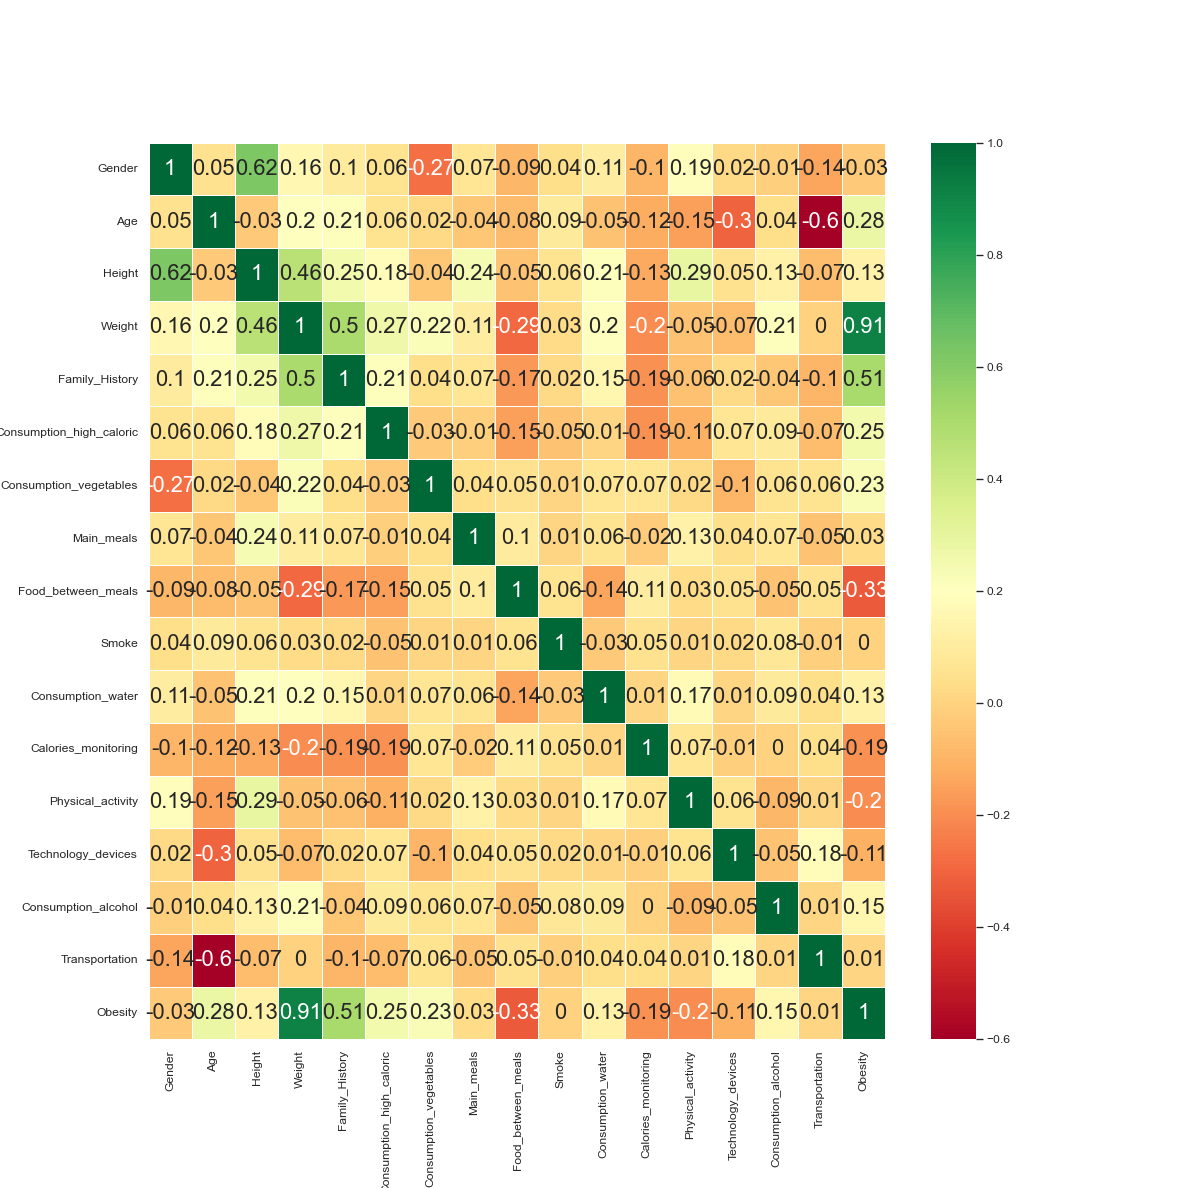

In [28]:
#FIGURE 9. Correlation matrix of the dataset features

#https://likegeeks.com/python-correlation-matrix/
import pandas as pd
import numpy as np
import seaborn as sns
df_small = reproduce_df.iloc[:,0:17]  #independent columns
#get correlations of each features in dataset
corrmat = df_small.corr().round(2)
#plot heat map
fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches
gx=sns.heatmap(corrmat,annot=True,cmap="RdYlGn",linewidths=.5,annot_kws={"fontsize":20},ax=ax)

plt.show()
plt.savefig("heatmap_natalie.png")

In [29]:
#https://datatofish.com/correlation-matrix-pandas/
reproduce_df.corr().round(1)

,Gender,Age,Height,Weight,Family_History,Consumption_high_caloric,Consumption_vegetables,Main_meals,Food_between_meals,Smoke,Consumption_water,Calories_monitoring,Physical_activity,Technology_devices,Consumption_alcohol,Transportation,Obesity
Gender,1.0,0.0,0.6,0.2,0.1,0.1,-0.3,0.1,-0.1,0.0,0.1,-0.1,0.2,0.0,-0.0,-0.1,-0.0
Age,0.0,1.0,-0.0,0.2,0.2,0.1,0.0,-0.0,-0.1,0.1,-0.0,-0.1,-0.1,-0.3,0.0,-0.6,0.3
Height,0.6,-0.0,1.0,0.5,0.2,0.2,-0.0,0.2,-0.0,0.1,0.2,-0.1,0.3,0.1,0.1,-0.1,0.1
Weight,0.2,0.2,0.5,1.0,0.5,0.3,0.2,0.1,-0.3,0.0,0.2,-0.2,-0.1,-0.1,0.2,0.0,0.9
Family_History,0.1,0.2,0.2,0.5,1.0,0.2,0.0,0.1,-0.2,0.0,0.1,-0.2,-0.1,0.0,-0.0,-0.1,0.5
Consumption_high_caloric,0.1,0.1,0.2,0.3,0.2,1.0,-0.0,-0.0,-0.2,-0.1,0.0,-0.2,-0.1,0.1,0.1,-0.1,0.2
Consumption_vegetables,-0.3,0.0,-0.0,0.2,0.0,-0.0,1.0,0.0,0.1,0.0,0.1,0.1,0.0,-0.1,0.1,0.1,0.2
Main_meals,0.1,-0.0,0.2,0.1,0.1,-0.0,0.0,1.0,0.1,0.0,0.1,-0.0,0.1,0.0,0.1,-0.1,0.0
Food_between_meals,-0.1,-0.1,-0.0,-0.3,-0.2,-0.2,0.1,0.1,1.0,0.1,-0.1,0.1,0.0,0.0,-0.0,0.0,-0.3
Smoke,0.0,0.1,0.1,0.0,0.0,-0.1,0.0,0.0,0.1,1.0,-0.0,0.0,0.0,0.0,0.1,-0.0,0.0


METHODS(Train:Test at 0.8:0.2)

In [30]:
xx=reproduce_df[['Weight', 'Family_History', 'Age','Consumption_high_caloric', 'Consumption_vegetables']].values
##xx=reproduce_df[['Weight', 'Age', 'Gender', 'Consumption_vegetables','Height']].values
##xx=reproduce_df[['Weight', 'Family_History', 'Age','Food_between_meals', 'Consumption_high_caloric', 'Consumption_vegetables']]
yy=reproduce_df['Obesity'].values

In [31]:
from sklearn.model_selection import train_test_split
#https://realpython.com/train-test-split-python-data/
x_train,x_test,y_train,y_test=train_test_split(xx,yy,test_size=0.2,random_state=0)
d=pd.DataFrame(x_train)

In [32]:
# logistic regression for multi-class classification using a one-vs-rest
#https://www.geeksforgeeks.org/one-vs-rest-strategy-for-multi-class-classification/
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score
# define dataset
model0 = OneVsRestClassifier(LogisticRegression())
   
# Fitting the model with training data
model0.fit(x_train, y_train)
   
# Making a prediction on the test set
prediction0 = model0.predict(x_test)
y_prob_pred0 = model0.predict_proba(x_test)

#roc auc score
roc0=roc_auc_score(y_test, y_prob_pred0, multi_class='ovo', average='weighted')

# Evaluating the model
print(f"Test Set Accuracy for LR: {accuracy_score(y_test, prediction0) * 100} %\n\n")
print(f"Classification Report(LR) : \n\n{classification_report(y_test, prediction0)}")
roc0=roc_auc_score(y_test, y_prob_pred0, multi_class='ovo', average='weighted')
print(f"The roc auc score for LR: {roc0}")

Test Set Accuracy for LR: 60.99290780141844 %


Classification Report(LR) : 

              precision    recall  f1-score   support

           0       0.74      0.92      0.82        65
           1       0.63      0.39      0.48        57
           2       0.58      0.33      0.42        57
           3       0.43      0.33      0.37        55
           4       0.42      0.60      0.49        67
           5       0.81      0.57      0.67        53
           6       0.69      1.00      0.82        69

    accuracy                           0.61       423
   macro avg       0.61      0.59      0.58       423
weighted avg       0.61      0.61      0.59       423

The roc auc score for LR: 0.9126140891952882


<IPython.core.display.Javascript object>


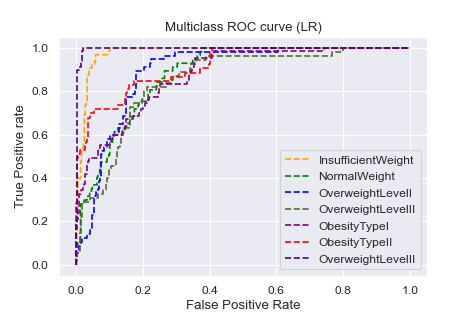

In [33]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 7

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_prob_pred0[:,i], pos_label=i)
    
plt.figure()

# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='InsufficientWeight')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='NormalWeight')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='OverweightLevelI')
plt.plot(fpr[3], tpr[3], linestyle='--',color='darkolivegreen', label='OverweightLevelII')
plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='ObesityTypeI')
plt.plot(fpr[5], tpr[5], linestyle='--',color='red', label='ObesityTypeII')
plt.plot(fpr[6], tpr[6], linestyle='--',color='indigo', label='OverweightLevelII')
plt.title('Multiclass ROC curve (LR)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC (LR)',dpi=300);    
plt.show()

<IPython.core.display.Javascript object>


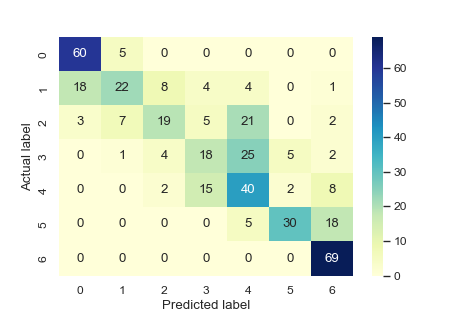

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm0 = confusion_matrix(y_test, prediction0 )
plt.figure()
sns.heatmap(cm0, annot=True, fmt='d', cmap='YlGnBu')
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

In [35]:
from sklearn.svm import SVC


model1 = OneVsRestClassifier(SVC(probability=True))
   
# Fitting the model with training data
model1.fit(x_train, y_train)
   
# Making a prediction on the test set
prediction1 = model1.predict(x_test)
y_prob_pred1 = model1.predict_proba(x_test)



# Evaluating the model
print(f"Test Set Accuracy for SVM: {accuracy_score(y_test, prediction1) * 100} %\n\n")
print(f"Classification Report(SVM) : \n\n{classification_report(y_test, prediction1)}")
roc1=roc_auc_score(y_test, y_prob_pred0, multi_class='ovo', average='weighted')
print(f"The roc auc score for SVM: {roc1}")

Test Set Accuracy for SVM: 56.50118203309693 %


Classification Report(SVM) : 

              precision    recall  f1-score   support

           0       0.60      1.00      0.75        65
           1       0.53      0.16      0.24        57
           2       0.66      0.58      0.62        57
           3       0.50      0.25      0.34        55
           4       0.47      0.70      0.57        67
           5       0.49      0.74      0.59        53
           6       0.80      0.46      0.59        69

    accuracy                           0.57       423
   macro avg       0.58      0.56      0.53       423
weighted avg       0.58      0.57      0.53       423

The roc auc score for SVM: 0.9126140891952882


<IPython.core.display.Javascript object>


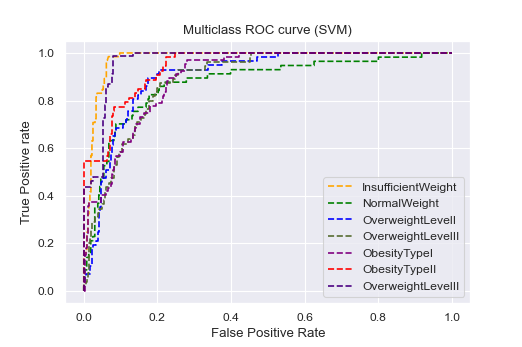

In [36]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 7

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_prob_pred1[:,i], pos_label=i)

plt.figure()
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='InsufficientWeight')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='NormalWeight')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='OverweightLevelI')
plt.plot(fpr[3], tpr[3], linestyle='--',color='darkolivegreen', label='OverweightLevelII')
plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='ObesityTypeI')
plt.plot(fpr[5], tpr[5], linestyle='--',color='red', label='ObesityTypeII')
plt.plot(fpr[6], tpr[6], linestyle='--',color='indigo', label='OverweightLevelII')
plt.title('Multiclass ROC curve (SVM)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC (SVM)',dpi=300);    
plt.show()

<IPython.core.display.Javascript object>


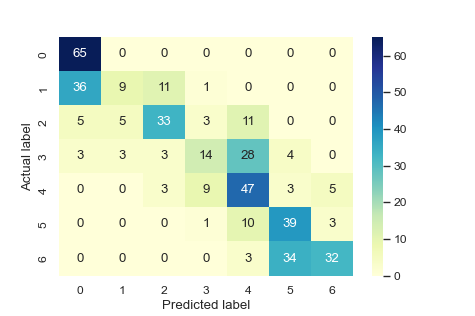

In [37]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm1 = confusion_matrix(y_test, prediction1 )
plt.figure()
sns.heatmap(cm1, annot=True, fmt='d', cmap='YlGnBu')
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

In [38]:
#https://www.vebuso.com/2020/03/svm-hyperparameter-tuning-using-gridsearchcv/
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier

model2 = OneVsRestClassifier(RandomForestClassifier())
   
# Fitting the model with training data
model2.fit(x_train, y_train)
   
# Making a prediction on the test set
prediction2 = model2.predict(x_test)
y_prob_pred2 = model2.predict_proba(x_test)



# Evaluating the model
print(f"Test Set Accuracy for RF: {accuracy_score(y_test, prediction2) * 100} %\n\n")
print(f"Classification Report(RF) : \n\n{classification_report(y_test, prediction2)}")
roc2=roc_auc_score(y_test, y_prob_pred2, multi_class='ovo', average='weighted')
print(f"The roc auc score for RF: {roc2}")

Test Set Accuracy for RF: 83.68794326241135 %


Classification Report(RF) : 

              precision    recall  f1-score   support

           0       0.81      0.85      0.83        65
           1       0.65      0.70      0.67        57
           2       0.90      0.77      0.83        57
           3       0.75      0.71      0.73        55
           4       0.85      0.84      0.84        67
           5       0.91      0.98      0.95        53
           6       0.99      0.99      0.99        69

    accuracy                           0.84       423
   macro avg       0.84      0.83      0.83       423
weighted avg       0.84      0.84      0.84       423

The roc auc score for RF: 0.9835158040846047


<IPython.core.display.Javascript object>


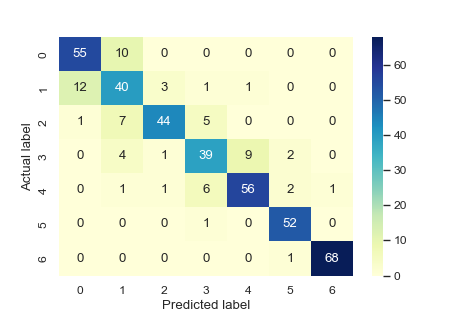

In [39]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm2 = confusion_matrix(y_test, prediction2 )
plt.figure()
sns.heatmap(cm2, annot=True, fmt='d', cmap='YlGnBu')
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

<IPython.core.display.Javascript object>


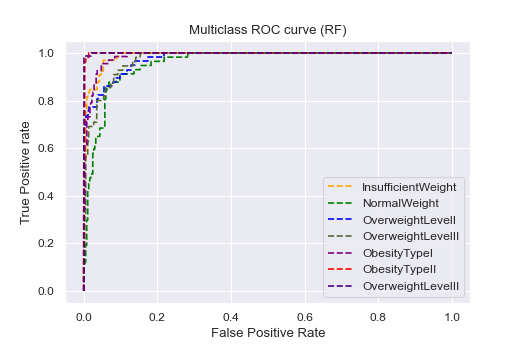

In [40]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 7

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_prob_pred2[:,i], pos_label=i)

plt.figure()
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='InsufficientWeight')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='NormalWeight')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='OverweightLevelI')
plt.plot(fpr[3], tpr[3], linestyle='--',color='darkolivegreen', label='OverweightLevelII')
plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='ObesityTypeI')
plt.plot(fpr[5], tpr[5], linestyle='--',color='red', label='ObesityTypeII')
plt.plot(fpr[6], tpr[6], linestyle='--',color='indigo', label='OverweightLevelII')
plt.title('Multiclass ROC curve (RF)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC (RF)',dpi=300);    
plt.show()